In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
default = pd.read_csv('creditcard.csv')

In [5]:
default.isnull().sum().sort_values(ascending=False).head()

AGE          36
LIMIT_BAL    32
EDUCATION    27
SEX          23
MARRIAGE     20
dtype: int64

In [6]:
default.rename(columns={'default payment next month':'default'}, inplace=True)

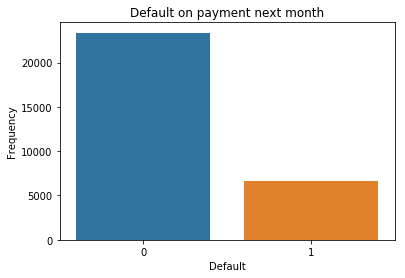

In [7]:
#DATA EXPLORATION

import seaborn as sns
sns.countplot(default['default'], label="Count")
plt.title('Default on payment next month')
plt.xlabel('Default')
plt.ylabel('Frequency')
plt.show()

In [8]:
print(default.shape)

print(default['default'].value_counts())

(30000, 25)
0    23364
1     6636
Name: default, dtype: int64


In [9]:
print(default.groupby('default').mean())

                   ID      LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
default                                                               
0        15064.893982  178097.446006  1.613922   1.841095  1.558782   
1        14773.781947  130144.402895  1.566797   1.894602  1.528125   

               AGE     PAY_0     PAY_2     PAY_3     PAY_4     ...       \
default                                                        ...        
0        35.418395 -0.211231 -0.301917 -0.316256 -0.355633     ...        
1        35.725271  0.668174  0.458258  0.362116  0.254521     ...        

            BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6     PAY_AMT1  \
default                                                                        
0        47533.365605  43611.165254  40530.445343  39042.268704  6307.337357   
1        45181.598855  42036.950573  39540.190476  38271.435503  3397.044153   

            PAY_AMT2     PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6  
default           

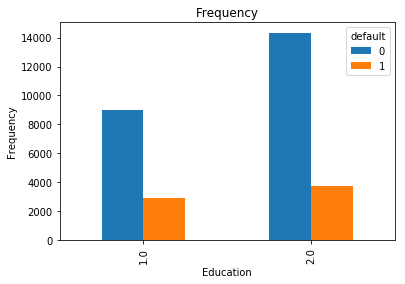

In [10]:
%matplotlib inline
pd.crosstab(default.SEX,default.default).plot(kind='bar')
plt.title('Frequency')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.savefig('purchase_fre_job')

In [11]:
default.rename(columns={'default payment next month':'default'}, inplace=True)
default = default.dropna()
default = default.drop(['ID'], axis=1)
default.shape

(29874, 24)

In [12]:
#One-Hot Encoding - Used for categorical features

default['male'] = (default['SEX'] == 1).astype('int')
default.drop('SEX', axis=1, inplace=True)

default['grad_school'] = (default['EDUCATION'] == 1).astype('int')
default['university'] = (default['EDUCATION'] == 2).astype('int')
default['high_school'] = (default['EDUCATION'] == 3).astype('int')
default.drop('EDUCATION', axis=1, inplace=True)

default['married'] = (default['MARRIAGE'] == 1).astype('int')
default.drop('MARRIAGE', axis=1, inplace=True)

pay_features = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    default.loc[default[p]<=0, p] = 0
    
    
default.shape

(29874, 26)

In [13]:
X = default.drop('default', axis= 1)
Y = default['default']

print(X.shape)
print(Y.shape)

(29874, 25)
(29874,)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

#Sets all variables to the same scale
robust_scaler = RobustScaler()
robust_scaler.fit_transform(X)

array([[-0.63157895, -0.76923077,  2.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.10526316, -0.61538462,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.26315789,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.57894737,  0.23076923,  4.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.31578947,  0.53846154,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [-0.47368421,  0.92307692,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

In [15]:
#Split data set, 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

print(X_train.shape)
print(X_test.shape)


(25392, 25)
(4482, 25)


In [16]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=7)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [17]:
colnames_selected

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [18]:
def CMatrix(CM, labels=['pay', 'default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [19]:
from sklearn.metrics import accuracy_score

metrics = pd.DataFrame(index=['accuracy'],
                      columns=['SVM', 'LogisticalReg'])

In [20]:
from sklearn import svm

svm  = svm.SVC()
svm.fit(X_train_selected, y_train)

y_pred_test = svm.predict(X_test_selected)
metrics.loc['accuracy', 'SVM'] = accuracy_score(y_pred=y_pred_test, y_true = y_test)
100*metrics

,SVM,LogisticalReg
accuracy,82.2624,NaN


In [21]:
from sklearn.linear_model import LogisticRegression

#n_jobs=-1 = Use all available cores in machine
#random_state = randomise data
lg = LogisticRegression(random_state=10)

#use training data
lg.fit(X_train,y_train)

y_pred_test = lg.predict(X_test)
metrics.loc['accuracy', 'LogisticalReg'] = accuracy_score(y_pred=y_pred_test, y_true = y_test)
100*metrics

,SVM,LogisticalReg
accuracy,82.2624,78.7595


In [22]:
100*metrics

,SVM,LogisticalReg
accuracy,82.2624,78.7595


In [23]:
#SVM WITH NO DATA CLEANING OR PREPROCESSING

In [24]:
default_noPP = pd.read_csv('creditcard.csv')

In [25]:
default.rename(columns={'default payment next month':'default'}, inplace=True)

In [26]:
#Split data set, 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)


(25392, 25)
(4482, 25)


In [27]:
from sklearn import svm

svm  = svm.SVC()
svm.fit(X_train_selected, y_train)

y_pred_test = svm.predict(X_test_selected)
metrics.loc['accuracy', 'SVM'] = accuracy_score(y_pred=y_pred_test, y_true = y_test)
100*metrics

,SVM,LogisticalReg
accuracy,77.2869,78.7595
